In [13]:
from pathlib import Path
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

# Localisation du fichier CSV
current_dir = Path().resolve()
project_root = current_dir.parent
data_path = project_root / "Data" / "Dataset of weighing station temperature measurements.csv"

print("Fichier CSV :", data_path)

df = pd.read_csv(data_path, sep=";")

# Aperçu
display(df.head())
print(df.columns)

Fichier CSV : C:\Users\simon\Desktop\Analyse_donnees_TT\Data\Dataset of weighing station temperature measurements.csv


,Time,Outdoor temperature [deg. C],Outdoor relative humidity [%],T[degC]-Low-S1,T[degC]-Low-S2,T[degC]-Low-S3,T[degC]-Low-S4,T[degC]-Low-S5,T[degC]-Low-S6,T[degC]-Low-S7,...,T[degC]-Top-S20,T[degC]-Top-S21,T[degC]-Top-S22,T[degC]-Top-S23,T[degC]-Top-S24,T[degC]-Top-S25,T[degC]-Top-S26,T[degC]-Top-S27,T[degC]-Top-S28,T[degC]-Top-S29
0,2023-12-21 12:10,-3.883333,42.333333,33.522705,31.560910,34.793104,30.900530,NaN,22.404998,33.093054,...,8.361203,14.383413,8.152400,11.794627,0.243417,-0.262979,0.135317,0.686731,-0.371935,0.519350
1,2023-12-21 12:12,-3.880000,42.400000,33.803224,31.345106,35.152043,30.010469,NaN,20.637749,32.470107,...,7.510757,13.676871,8.008640,11.373162,-0.190435,-0.432580,-0.057492,0.495419,-0.384059,0.387556
2,2023-12-21 12:14,-3.876667,42.466667,33.184819,30.096022,32.640345,28.717193,NaN,19.941584,31.789397,...,8.691577,14.843329,8.229449,11.859397,0.781753,-0.493263,0.411335,1.067664,-0.335581,0.614961
3,2023-12-21 12:16,-3.873333,42.533333,33.534186,31.024726,33.257158,29.600942,NaN,21.224968,31.869777,...,10.831607,16.998668,10.048923,13.826938,2.526770,0.913081,2.549498,2.620016,-0.178265,1.800967
4,2023-12-21 12:18,-3.870000,42.600000,34.166208,32.214443,34.975090,31.081814,NaN,22.437115,32.675023,...,10.396931,16.572248,9.798096,13.483880,2.187975,0.471456,1.553302,2.059153,-0.190359,1.612425


Index(['Time', 'Outdoor temperature [deg. C]', 'Outdoor relative humidity [%]',
       'T[degC]-Low-S1', 'T[degC]-Low-S2', 'T[degC]-Low-S3', 'T[degC]-Low-S4',
       'T[degC]-Low-S5', 'T[degC]-Low-S6', 'T[degC]-Low-S7', 'T[degC]-Low-S8',
       'T[degC]-Low-S9', 'T[degC]-Low-S10', 'T[degC]-Low-S11',
       'T[degC]-Low-S12', 'T[degC]-Low-S13', 'T[degC]-Low-S14',
       'T[degC]-Low-S15', 'T[degC]-Low-S16', 'T[degC]-Low-S17',
       'T[degC]-Low-S18', 'T[degC]-Low-S19', 'T[degC]-Low-S20',
       'T[degC]-Low-S21', 'T[degC]-Low-S22', 'T[degC]-Low-S23',
       'T[degC]-Low-S24', 'T[degC]-Low-S25', 'T[degC]-Low-S26',
       'T[degC]-Low-S27', 'T[degC]-Low-S28', 'T[degC]-Low-S29',
       'T[degC]-Mid-S1', 'T[degC]-Mid-S2', 'T[degC]-Mid-S3', 'T[degC]-Mid-S4',
       'T[degC]-Mid-S5', 'T[degC]-Mid-S6', 'T[degC]-Mid-S7', 'T[degC]-Mid-S8',
       'T[degC]-Mid-S9', 'T[degC]-Mid-S10', 'T[degC]-Mid-S11',
       'T[degC]-Mid-S12', 'T[degC]-Mid-S13', 'T[degC]-Mid-S14',
       'T[degC]-Mid-S15', 'T[d

In [14]:
# convertir la colonne Time en datetime et la mettre en index
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time').sort_index()

df.head()
print(df)

                     Outdoor temperature [deg. C]  \
Time                                                
2023-12-21 12:10:00                     -3.883333   
2023-12-21 12:12:00                     -3.880000   
2023-12-21 12:14:00                     -3.876667   
2023-12-21 12:16:00                     -3.873333   
2023-12-21 12:18:00                     -3.870000   
...                                           ...   
2024-03-05 13:36:00                     10.200000   
2024-03-05 13:38:00                     10.216667   
2024-03-05 13:40:00                     10.233333   
2024-03-05 13:42:00                     10.250000   
2024-03-05 13:44:00                     10.266667   

                     Outdoor relative humidity [%]  T[degC]-Low-S1  \
Time                                                                 
2023-12-21 12:10:00                      42.333333       33.522705   
2023-12-21 12:12:00                      42.400000       33.803224   
2023-12-21 12:14:00           

In [15]:
# Colonnes de température à l'intérieur du puits
low_cols = [c for c in df.columns if "Low" in c]
mid_cols = [c for c in df.columns if "Mid" in c]
top_cols = [c for c in df.columns if "Top" in c]

# trie par numéro de capteur S1, S2, ... 
def sort_by_sensor(col_list):
    return sorted(col_list, key=lambda x: int(x.split("-S")[1]))

low_cols = sort_by_sensor(low_cols)
mid_cols = sort_by_sensor(mid_cols)
top_cols = sort_by_sensor(top_cols)

print("Nb capteurs LOW :", len(low_cols))
print("Nb capteurs MID :", len(mid_cols))
print("Nb capteurs TOP :", len(top_cols))

print("\nExemples LOW :", low_cols[:5])
print("Exemples MID :", mid_cols[:5])
print("Exemples TOP :", top_cols[:5])


Nb capteurs LOW : 29
Nb capteurs MID : 29
Nb capteurs TOP : 29

Exemples LOW : ['T[degC]-Low-S1', 'T[degC]-Low-S2', 'T[degC]-Low-S3', 'T[degC]-Low-S4', 'T[degC]-Low-S5']
Exemples MID : ['T[degC]-Mid-S1', 'T[degC]-Mid-S2', 'T[degC]-Mid-S3', 'T[degC]-Mid-S4', 'T[degC]-Mid-S5']
Exemples TOP : ['T[degC]-Top-S1', 'T[degC]-Top-S2', 'T[degC]-Top-S3', 'T[degC]-Top-S4', 'T[degC]-Top-S5']


In [16]:
#Zone de référence pour ON/OFF 
sensors_ref = [11, 12, 13]

T_low_ref = df[[low_cols[s-1] for s in sensors_ref]].mean(axis=1)
T_mid_ref = df[[mid_cols[s-1] for s in sensors_ref]].mean(axis=1)
T_top_ref = df[[top_cols[s-1] for s in sensors_ref]].mean(axis=1)

dT_local_ref  = T_top_ref - T_low_ref
dT_smooth_ref = dT_local_ref.rolling(5, center=True).mean()

on_threshold = 3.5
heater_on = dT_smooth_ref > on_threshold
print(T_low_ref.head())

Time
2023-12-21 12:10:00    12.456518
2023-12-21 12:12:00    11.750527
2023-12-21 12:14:00    12.010257
2023-12-21 12:16:00    13.529740
2023-12-21 12:18:00    13.660468
dtype: float64


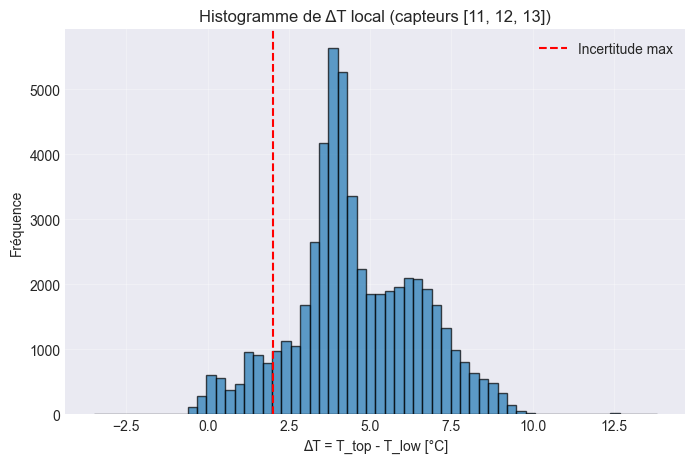

In [17]:
# Histogramme de ΔT local (T_top - T_low) pour les capteurs de référence
plt.figure(figsize=(8, 5))
plt.hist(
    dT_local_ref.dropna(),    
    bins=60,              
    edgecolor="black",
    alpha=0.7
)

plt.xlabel("ΔT = T_top - T_low [°C]")
plt.ylabel("Fréquence")
plt.title(f"Histogramme de ΔT local (capteurs {sensors_ref})")
plt.grid(True, alpha=0.3)

# (optionnel) ligne verticale pour l’incertitude max des capteurs (~2 °C)
incertitude_max = 2.0
plt.axvline(incertitude_max, color="red", linestyle="--", label="Incertitude max")
plt.legend()

plt.show()

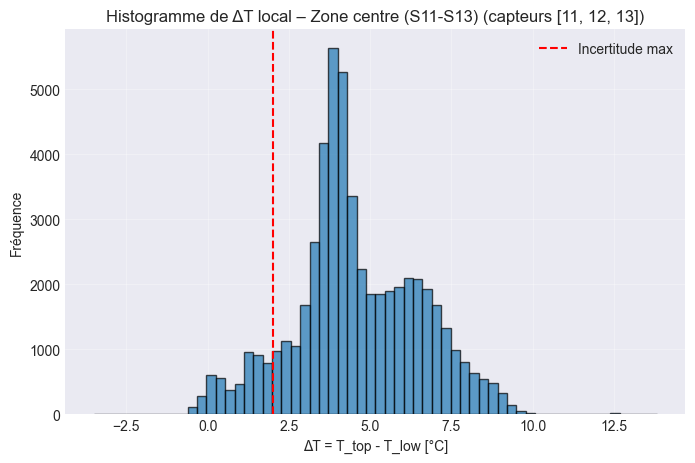

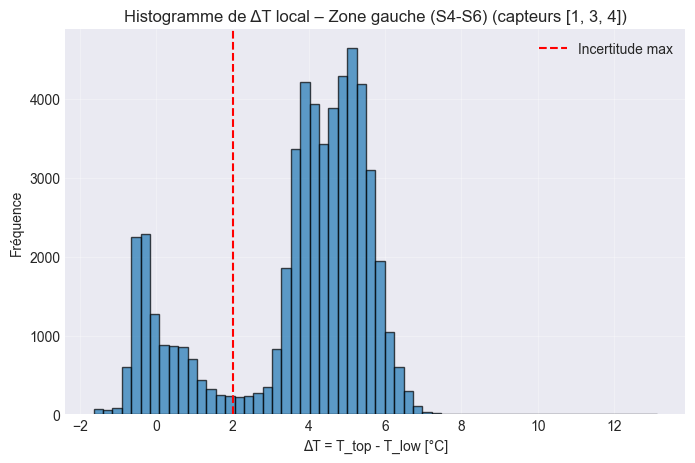

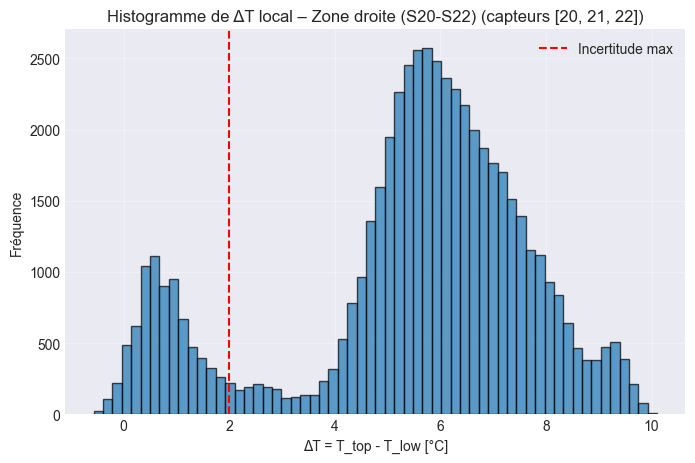

In [18]:
# Histogrammes de ΔT local dans différentes zones du puits

incertitude_max = 2.0
bins = 60

zones = {
    "Zone centre (S11-S13)": [11, 12, 13],
    "Zone gauche (S4-S6)"  : [1, 3, 4],
    "Zone droite (S20-S22)": [20, 21, 22],
}

for zone_name, zone_sensors in zones.items():
    T_low_zone = df[[low_cols[s-1] for s in zone_sensors]].mean(axis=1)
    T_top_zone = df[[top_cols[s-1] for s in zone_sensors]].mean(axis=1)
    dT_zone    = T_top_zone - T_low_zone

    plt.figure(figsize=(8,5))
    plt.hist(dT_zone.dropna(), bins=bins, edgecolor="black", alpha=0.7)
    plt.axvline(incertitude_max, color="red", linestyle="--", label="Incertitude max")
    plt.xlabel("ΔT = T_top - T_low [°C]")
    plt.ylabel("Fréquence")
    plt.title(f"Histogramme de ΔT local – {zone_name} (capteurs {zone_sensors})")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()



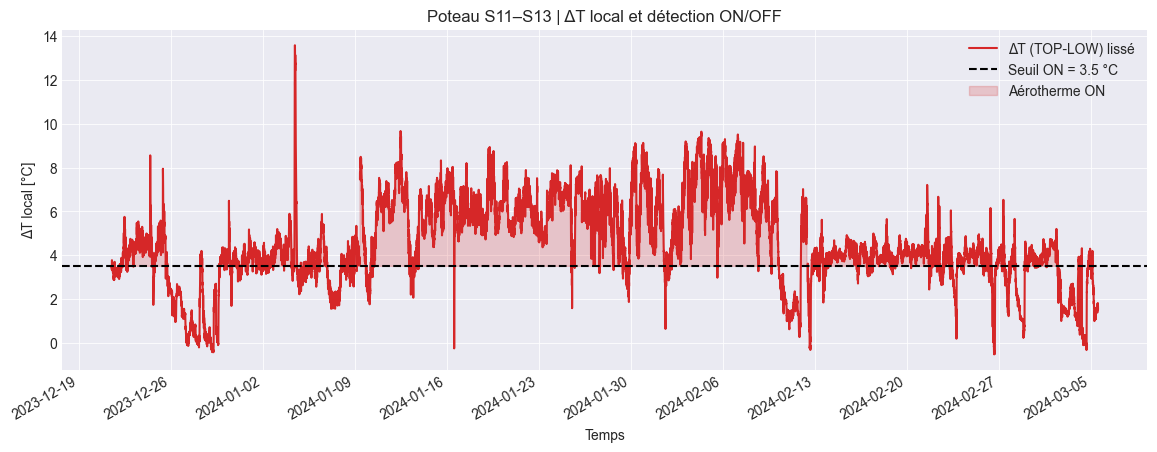

In [19]:
# Visualisation de ΔT local lissé et détection ON/OFF
plt.figure(figsize=(14,5))
plt.plot(dT_smooth_ref, label="ΔT (TOP-LOW) lissé", color="tab:red")
plt.axhline(on_threshold, color="black", linestyle="--",
            label=f"Seuil ON = {on_threshold} °C")

plt.fill_between(dT_smooth_ref.index, on_threshold, dT_smooth_ref,
                 where=heater_on, color="tab:red", alpha=0.2,
                 label="Aérotherme ON")

plt.xlabel("Temps")
plt.ylabel("ΔT local [°C]")
plt.title(f"Poteau S{sensors_ref[0]}–S{sensors_ref[-1]} | ΔT local et détection ON/OFF")
plt.legend()
plt.grid(True, alpha=0.8)
# Format et fréquence des dates sur l’axe X
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # une date par semaine
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format AAAA-MM-JJ

plt.gcf().autofmt_xdate()  # rotation automatique des dates

plt.show()


T_ext_arrondie
-24    100.000000
-23    100.000000
-22    100.000000
-21    100.000000
-20    100.000000
-19     93.023256
-18     95.609756
-17     94.695481
-16     84.090909
-15     91.137649
-14     97.350343
-13     94.928401
-12     92.871209
-11     91.523810
-10     81.679389
-9      78.441836
-8      82.455124
-7      82.208589
-6      84.561533
-5      85.320322
-4      90.063694
-3      92.893401
-2      95.274694
-1      83.626302
0       62.683945
1       18.080725
2       11.764706
3       13.713714
4        1.666667
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
Name: ON, dtype: float64
T_ext moyenne quand heater ON  : -7.39 °C
T_ext moyenne quand heater OFF : -2.08 °C
T_int locale moyenne quand ON  : 21.63 °C
T_int locale moyenne quand OFF : 13.06 °C


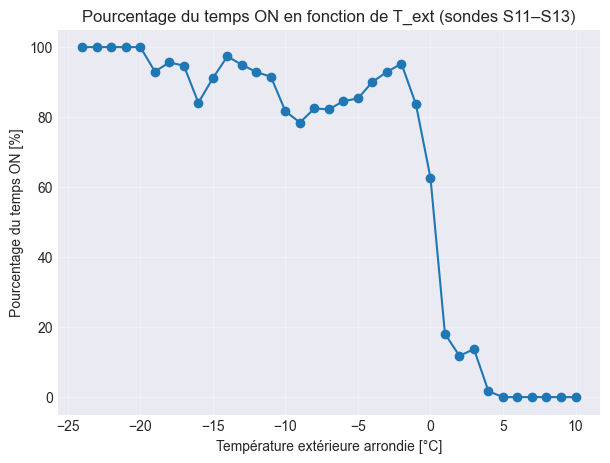

In [20]:
#Pourcentage du temps ON en fonction de T_ext et autres infos

T_ext = df["Outdoor temperature [deg. C]"]

tmp = pd.DataFrame({
    "T_ext_arrondie": T_ext.round().astype("Int64"),
    "ON": heater_on.astype(int)
})
pourcentage_on_ext = tmp.groupby("T_ext_arrondie")["ON"].mean().sort_index() * 100

print(pourcentage_on_ext)

T_ext_ON  = T_ext[heater_on]
T_ext_OFF = T_ext[~heater_on]

T_int_zone = (T_low_ref + T_mid_ref + T_top_ref) / 3

T_int_ON  = T_int_zone[heater_on]
T_int_OFF = T_int_zone[~heater_on]

print(f"T_ext moyenne quand heater ON  : {T_ext_ON.mean():.2f} °C")
print(f"T_ext moyenne quand heater OFF : {T_ext_OFF.mean():.2f} °C")
print(f"T_int locale moyenne quand ON  : {T_int_ON.mean():.2f} °C")
print(f"T_int locale moyenne quand OFF : {T_int_OFF.mean():.2f} °C")

plt.figure(figsize=(7,5))
plt.plot(pourcentage_on_ext.index, pourcentage_on_ext.values, marker="o")
plt.xlabel("Température extérieure arrondie [°C]")
plt.ylabel("Pourcentage du temps ON [%]")
plt.title(f"Pourcentage du temps ON en fonction de T_ext (sondes S{sensors_ref[0]}–S{sensors_ref[-1]})")
plt.grid(True, alpha=0.3)
plt.show()


In [21]:
# Modelisation ON/OFF pour 5 zones du puits
zones_dict = {
    "P1": [1, 2, 3, 4],   
    "P2": [6, 7, 8, 9],      
    "P3": [10, 11, 12, 13],   
    "P4": [14, 15, 16, 17], 
    "P5": [19, 20, 21, 22], 
    "P6": [26, 27, 28, 29], 


}    

# Date à partir de laquelle P6 a des données valides
date_debut_P6 = "2024-01-26"

T_ext_all = df["Outdoor temperature [deg. C]"]

list_zones_df = []

for zone_name, sondes in zones_dict.items():

    if zone_name == "P6":
        df_zone = df.loc[df.index >= date_debut_P6].copy()
        T_ext_zone = T_ext_all.loc[T_ext_all.index >= date_debut_P6]
    else:
        df_zone = df
        T_ext_zone = T_ext_all

    # Températures low/mid/top pour cette zone
    T_low_zone = df_zone[[low_cols[s-1] for s in sondes]].mean(axis=1)
    T_mid_zone = df_zone[[mid_cols[s-1] for s in sondes]].mean(axis=1)
    T_top_zone = df_zone[[top_cols[s-1] for s in sondes]].mean(axis=1)

    # ΔT local
    dT_local_zone = T_top_zone - T_low_zone
    dT_smooth_zone = dT_local_zone.rolling(5, center=True).mean()

    # Détection ON/OFF
    heater_on_zone = (dT_smooth_zone > on_threshold)

    # Température intérieure moyenne
    T_int_zone = (T_low_zone + T_mid_zone + T_top_zone) / 3

    # Petit tableau final
    df_zone_final = pd.DataFrame({
        "zone": zone_name,
        "T_ext": T_ext_zone,
        "T_ext_arrondie": T_ext_zone.round().astype("Int64"),
        "ON": heater_on_zone.astype(int),
        "T_int": T_int_zone,
    })

    list_zones_df.append(df_zone_final)

# Concatène toutes les zones
df_all_zones = pd.concat(list_zones_df, ignore_index=True)
#print(list_zones_df)
print(df_all_zones)
T_ext_moy = T_ext_all.mean()
T_int_moy = df_all_zones["T_int"].mean()

print(f"T_ext moyenne : {T_ext_moy:.2f} °C")
print(f"T_int moyenne : {T_int_moy:.2f} °C")


       zone      T_ext  T_ext_arrondie  ON      T_int
0        P1  -3.883333              -4   0  36.438211
1        P1  -3.880000              -4   0  36.440848
2        P1  -3.876667              -4   1  35.262321
3        P1  -3.873333              -4   1  36.036324
4        P1  -3.870000              -4   1  36.903707
...     ...        ...             ...  ..        ...
298728   P6  10.200000              10   0  15.685063
298729   P6  10.216667              10   0  15.759742
298730   P6  10.233333              10   0  15.733069
298731   P6  10.250000              10   0  15.674390
298732   P6  10.266667              10   0  15.626396

[298733 rows x 5 columns]
T_ext moyenne : -6.14 °C
T_int moyenne : 21.54 °C


In [22]:
# Pourcentage du temps ON en fonction de T_ext (global, toutes zones confondues)
pourcentage_on_ext_global = (
    df_all_zones
        .groupby("T_ext_arrondie")["ON"]
        .mean()
        .sort_index() * 100
)

print(pourcentage_on_ext_global)


T_ext_arrondie
-24    80.000000
-23    80.000000
-22    80.000000
-21    63.136176
-20    60.188088
-19    61.277034
-18    56.436059
-17    62.312445
-16    66.657485
-15    67.326958
-14    70.156973
-13    67.594583
-12    69.770639
-11    69.679504
-10    61.812114
-9     62.704008
-8     60.273900
-7     61.802439
-6     65.059418
-5     55.324814
-4     53.893327
-3     56.559828
-2     58.775221
-1     51.929704
0      40.462941
1      10.993228
2       4.793609
3       6.068376
4       1.277778
5       1.127214
6       1.851852
7       3.333333
8       0.000000
9       0.000000
10      0.000000
Name: ON, dtype: float64


In [23]:
# Températures moyennes globales quand heater ON/OFF
T_ext_global_ON  = df_all_zones.loc[df_all_zones["ON"] == 1, "T_ext"].mean()
T_ext_global_OFF = df_all_zones.loc[df_all_zones["ON"] == 0, "T_ext"].mean()

T_int_global_ON  = df_all_zones.loc[df_all_zones["ON"] == 1, "T_int"].mean()
T_int_global_OFF = df_all_zones.loc[df_all_zones["ON"] == 0, "T_int"].mean()

print(f"T_ext moyenne globale quand heater ON  : {T_ext_global_ON:.2f} °C")
print(f"T_ext moyenne globale quand heater OFF : {T_ext_global_OFF:.2f} °C")
print(f"T_int locale moyenne globale ON        : {T_int_global_ON:.2f} °C")
print(f"T_int locale moyenne globale OFF       : {T_int_global_OFF:.2f} °C")


T_ext moyenne globale quand heater ON  : -7.70 °C
T_ext moyenne globale quand heater OFF : -4.30 °C
T_int locale moyenne globale ON        : 25.14 °C
T_int locale moyenne globale OFF       : 17.52 °C


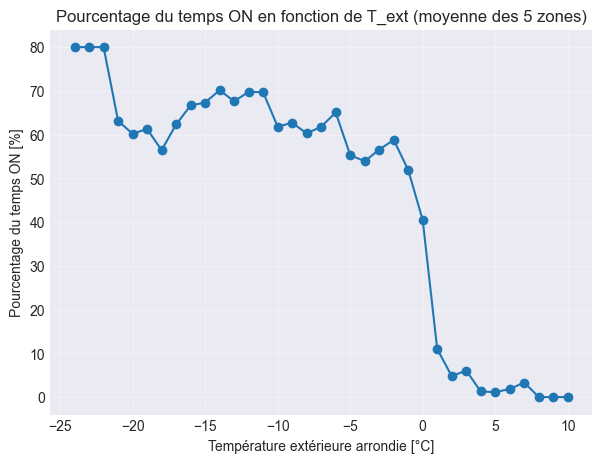

In [24]:
plt.figure(figsize=(7,5))
plt.plot(
    pourcentage_on_ext_global.index,
    pourcentage_on_ext_global.values,
    marker="o"
)
plt.xlabel("Température extérieure arrondie [°C]")
plt.ylabel("Pourcentage du temps ON [%]")
plt.title("Pourcentage du temps ON en fonction de T_ext (moyenne des 5 zones)")
plt.grid(True, alpha=0.3)
plt.show()


Les histogrammes de ΔT = T_top − T_low montrent que, dans toutes les zones étudiées, la majorité des valeurs sont largement au-dessus de l’incertitude des capteurs (~2 °C) : on observe typiquement des ΔT de 4 à 7 °C lorsque l’aérotherme fonctionne, ce qui confirme une stratification locale importante entre le bas et le haut du puits. Dans la zone droite, la distribution bimodale (un pic près de 0–1 °C et un autre vers 5–6 °C) distingue clairement les périodes sans chauffage des périodes où l’aérotherme est actif.

En utilisant un seuil de ΔT lissé de 3,5 °C pour détecter l’état ON/OFF, on montre que l’aérotherme est presque toujours ON quand la température extérieure est très froide (en dessous d’environ −15 à −20 °C), puis son temps de fonctionnement diminue rapidement à l’approche de 0 °C et devient quasi nul au-delà de 5 °C. Globalement, sur la période étudiée, T_ext moyenne est d’environ −6 °C alors que T_int moyenne est autour de 21–22 °C. Quand l’aérotherme est ON, l’extérieur est en moyenne plus froid (≈ −7,7 °C) et l’intérieur atteint ~25 °C; lorsqu’il est OFF, l’extérieur est plus doux (≈ −4 °C) et l’intérieur descend autour de 17–18 °C. En résumé, l’aérotherme est fortement sollicité par temps froid, crée des ΔT verticaux de plusieurs degrés et permet de maintenir des températures intérieures nettement supérieures à la température extérieure.
